1. GDP per capita affects the prevalence of medical doctors per region?
2. Create a Scatterplot and perform a Line Regression 
3. GDP Per Capital vs Life Expectancy per region
4. Create a Scatterplot and perform a Line Regressin/(other anaylisis)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy import stats
import seaborn as sns
pd.options.mode.copy_on_write = True


In [2]:
#run cleaning & merging ipynb
%run analysis.ipynb



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  9928 non-null   object 
 1   Year                                     9928 non-null   int64  
 2   Gender                                   9928 non-null   object 
 3   Life expectancy                          9928 non-null   float64
 4   Unemployment                             9928 non-null   float64
 5   Infant Mortality                         9928 non-null   float64
 6   GDP                                      9928 non-null   float64
 7   GNI                                      9928 non-null   float64
 8   Clean fuels and cooking technologies     9928 non-null   float64
 9   Per Capita                               9928 non-null   float64
 10  Mortality caused by road traffic injury  9928 no

In [8]:
country_doctors_total_avg_filtered
country_doctors_total_avg_filtered = country_doctors_total_avg_filtered.rename(columns={'Life expectancy total population':'Life Expectancy'})
country_doctors_total_avg_filtered.head()

,Country,GDP,Per Capita,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Urban population,Rural population,"Population, female (percent of total)",Medical doctors (number),Life Expectancy
0,Afghanistan,1.857138e+10,512.909526,65.8,65.8,63.8,0.450889,45.802640,25.2644,74.7356,49.429954,9500.4,64.149149
3,Albania,1.336488e+10,4658.240106,98.8,98.8,95.6,3.052308,98.493376,59.3572,40.6428,49.884581,4826.0,78.355262
4,Algeria,1.685577e+11,4073.145408,91.8,91.8,87.4,1.820000,86.449686,72.0354,27.9646,49.045001,73456.5,76.491339
5,Angola,1.060423e+11,3573.626620,58.8,54.8,47.8,0.800000,49.678755,64.8250,35.1750,50.627161,6496.5,60.446212
6,Antigua and Barbuda,1.506947e+09,15784.778096,95.2,96.0,93.4,2.934250,86.711731,24.7328,75.2672,52.309463,264.0,76.772637


In [9]:
country_doctors_total_avg_filtered.isnull().sum()


Country                                  0
GDP                                      0
Per Capita                               0
DPT Immunization                         0
HepB3 Immunization                       0
                                        ..
Urban population                         0
Rural population                         0
Population, female (percent of total)    1
Medical doctors (number)                 0
Life Expectancy                          1
Length: 13, dtype: int64

In [10]:
country_doctors_total_avg_filtered = country_doctors_total_avg_filtered.dropna(axis=0, subset=['Life Expectancy'])
country_doctors_total_avg_filtered.shape

(149, 13)

In [11]:
wrd_pop_path = 'Data/World-population-by-countries-dataset.csv'
pop_data = pd.read_csv(wrd_pop_path)

In [12]:
pop_data.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,107195.0
1,Africa Eastern and Southern,AFE,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,694665117.0
2,Afghanistan,AFG,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,39835428.0
3,Africa Western and Central,AFW,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,470898870.0
4,Angola,AGO,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,33933611.0


In [13]:
#clean data, remain only year 2015-2019 data set,find average population, merge data
#in the main country_doctors_total_avg_filtered
pop_5yr = pop_data[['Country Name','2015','2016','2017','2018','2019']]
pop_5yr = pop_5yr.rename(columns={'Country Name':'Country'})
pop_5yr['Average Population'] = pop_5yr[['2015','2016','2017','2018','2019']].mean(axis=1)
pop_5yr['Average Population'] = pop_5yr['Average Population'].fillna(pop_5yr['Average Population'].median())
pop_5yr = pop_5yr.drop(['2015','2016','2017','2018','2019'],axis=1)
count_na = pop_5yr['Average Population'].isnull().sum()

pop_5yr.isnull().sum()

Country               0
Average Population    0
dtype: int64

In [14]:
df = country_doctors_total_avg_filtered.merge(pop_5yr,how='left',on='Country')
df.isnull().sum()

Country                                  0
GDP                                      0
Per Capita                               0
DPT Immunization                         0
HepB3 Immunization                       0
                                        ..
Rural population                         0
Population, female (percent of total)    0
Medical doctors (number)                 0
Life Expectancy                          0
Average Population                       0
Length: 14, dtype: int64

In [15]:
df.shape

(149, 14)

In [16]:
#calculate Male & Female population to the pop_5yr dataframe 
#find the average medical doctor per capita 
df = df.rename(columns={'Population, female (percent of total)':'Female Population in percentage'})
df["Female Polulation"] = df["Female Population in percentage"] /100 * df["Average Population"]
df["Male Population"] = df["Average Population"] - df["Female Polulation"]
df["Medical Doctor Per Capita"] = (df['Medical doctors (number)'] / df['Average Population'])
df['Medical Doctor Per Capita'] = df['Medical Doctor Per Capita'].apply(lambda x: round(x, 8))
df["No.Patient Per Doctor"] = 1 / df["Medical Doctor Per Capita"]
df.head()

,Country,GDP,Per Capita,DPT Immunization,HepB3 Immunization,Measles Immunization,Hospital beds,Basic sanitation services,Urban population,Rural population,Female Population in percentage,Medical doctors (number),Life Expectancy,Average Population,Female Polulation,Male Population,Medical Doctor Per Capita,No.Patient Per Doctor
0,Afghanistan,1.857138e+10,512.909526,65.8,65.8,63.8,0.450889,45.802640,25.2644,74.7356,49.429954,9500.4,64.149149,36261284.2,1.792394e+07,1.833735e+07,0.000262,3816.793893
1,Albania,1.336488e+10,4658.240106,98.8,98.8,95.6,3.052308,98.493376,59.3572,40.6428,49.884581,4826.0,78.355262,2870165.6,1.431770e+06,1.438396e+06,0.001681,594.728328
2,Algeria,1.685577e+11,4073.145408,91.8,91.8,87.4,1.820000,86.449686,72.0354,27.9646,49.045001,73456.5,76.491339,41390012.2,2.029973e+07,2.109028e+07,0.001775,563.462817
3,Angola,1.060423e+11,3573.626620,58.8,54.8,47.8,0.800000,49.678755,64.8250,35.1750,50.627161,6496.5,60.446212,29835743.4,1.510499e+07,1.473075e+07,0.000218,4592.633416
4,Antigua and Barbuda,1.506947e+09,15784.778096,95.2,96.0,93.4,2.934250,86.711731,24.7328,75.2672,52.309463,264.0,76.772637,95382.6,4.989413e+04,4.548847e+04,0.002768,361.297782


In [17]:
#final_df prepared df.drop(df.columns[[0, 1, 2]],axis = 1)
f_df = df.drop(df.columns[[3,4,5,6,7,8,9,10]],axis = 1)
f_df = f_df.sort_values(by='Per Capita', ascending=True)

f_df.head()

,Country,GDP,Per Capita,Medical doctors (number),Life Expectancy,Average Population,Female Polulation,Male Population,Medical Doctor Per Capita,No.Patient Per Doctor
24,Burundi,2.777063e+09,257.387657,892.000000,60.875798,10836200.4,5.460094e+06,5.376107e+06,0.000082,12147.716229
43,Eritrea,1.223861e+09,424.528209,238.000000,65.582592,10411254.1,5.281684e+06,5.129570e+06,0.000023,43744.531934
28,Central African Republic,2.006896e+09,434.875413,329.500000,52.170470,4607686.2,2.301317e+06,2.306369e+06,0.000072,13984.058174
84,Malawi,8.331166e+09,467.790419,1649.500000,63.283140,17678543.0,9.093972e+06,8.584571e+06,0.000093,10716.964956
95,Mozambique,1.426752e+10,498.032076,2407.666667,59.111772,28676598.0,1.462774e+07,1.404886e+07,0.000084,11910.433540


In [18]:
f_df.shape

(149, 10)

The r value is 0.4109621493536318


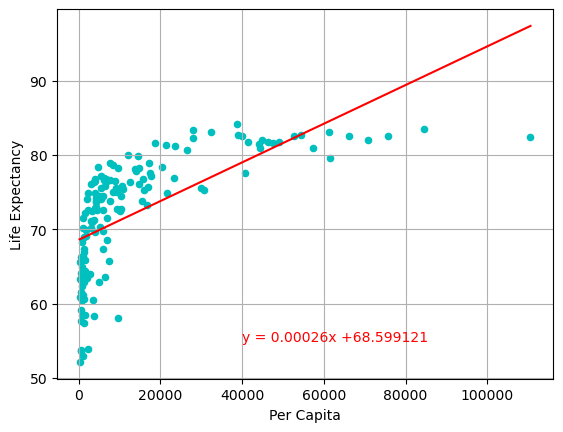

In [22]:
#If GDP per capita affects the prevalence of medical doctors per region?

f_df.plot(x='Per Capita', y='Life Expectancy', kind = 'scatter', 
           marker='o', color ='c',grid=True)

x_values = f_df['Per Capita']
y_values = f_df['Life Expectancy']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x +" + str(round(intercept,6))

plt.plot(x_values,regress_values,color='r')
plt.annotate(line_eq,(40000,55),fontsize=10,color="r")
print(f"The r value is {rvalue**2}")

#sns.lmplot(x='Per Capita', y='Life Expectancy',data=f_df)
